In [39]:
from pprint import pprint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
import praw

user_agent = "Scraper 1.0"
reddit = praw.Reddit(
    client_id = "gscPTd0wywq_IjgqoL1Smg",
    client_secret = "UAeWcM7eWeVXQVRJLZehtFq655Dzmw",
    user_agent = user_agent
)

In [41]:
headlines = set()

for submission in reddit.subreddit('politics').hot(limit = None):
    #print(submission.title)
    #print(submission.id)
    #print(submission.author)
    #print(submission.created_utc)
    #print(submission.score)
    #print(submission.upvote_ratio)
    #print(submission.url)
    #break
    headlines.add(submission.title)
for submission in reddit.subreddit('news').hot(limit = None):
    headlines.add(submission.title)
for submission in reddit.subreddit('worldnews').hot(limit = None):
    headlines.add(submission.title)
for submission in reddit.subreddit('technology').hot(limit = None):
    headlines.add(submission.title)
print(len(headlines))


2058


In [42]:
df = pd.DataFrame(headlines)
df.head()

,0
0,Ex-Chief of Staff Mark Meadows granted immunit...
1,Iran-Linked 'MuddyWater' Spies on Mideast Gov'...
2,UN chief ‘shocked’ by ‘misrepresentation’ of c...
3,Hamas terror chief openly supports civilian de...
4,"Spanish clergy sexually abused over 200,000 ch..."


In [43]:
df.to_csv('./CSV-files/news-headlines.csv', header = False, encoding = 'utf-8', index = False)

In [44]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/albert/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [45]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
sia = SIA()
results = []
for line in headlines:
    pol_score = sia.polarity_scores(line)
    pol_score['headline'] = line
    results.append(pol_score)

pprint(results[:3], width = 100 )

[{'compound': 0.3818,
  'headline': 'Ex-Chief of Staff Mark Meadows granted immunity, tells special counsel he warned '
              'Trump about 2020 claims: Sources',
  'neg': 0.101,
  'neu': 0.673,
  'pos': 0.226},
 {'compound': 0.0,
  'headline': "Iran-Linked 'MuddyWater' Spies on Mideast Gov't for 8 Months",
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0},
 {'compound': 0.0,
  'headline': 'UN chief ‘shocked’ by ‘misrepresentation’ of comments in row with Israel',
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0}]


In [46]:
df = pd.DataFrame.from_records(results)
df.head()

,neg,neu,pos,compound,headline
0,0.101,0.673,0.226,0.3818,Ex-Chief of Staff Mark Meadows granted immunit...
1,0.000,1.000,0.000,0.0000,Iran-Linked 'MuddyWater' Spies on Mideast Gov'...
2,0.000,1.000,0.000,0.0000,UN chief ‘shocked’ by ‘misrepresentation’ of c...
3,0.264,0.543,0.194,-0.2263,Hamas terror chief openly supports civilian de...
4,0.292,0.708,0.000,-0.5106,"Spanish clergy sexually abused over 200,000 ch..."


In [47]:
df['label'] = 0 
df.loc[df['compound'] > 0.2, 'label'] = 1
df.loc[df['compound'] < 0.2, 'label'] = -1
df.loc[(0.2 > df['compound']) & (df['compound'] > -0.2), 'label'] = 0
df.head()



,neg,neu,pos,compound,headline,label
0,0.101,0.673,0.226,0.3818,Ex-Chief of Staff Mark Meadows granted immunit...,1
1,0.000,1.000,0.000,0.0000,Iran-Linked 'MuddyWater' Spies on Mideast Gov'...,0
2,0.000,1.000,0.000,0.0000,UN chief ‘shocked’ by ‘misrepresentation’ of c...,0
3,0.264,0.543,0.194,-0.2263,Hamas terror chief openly supports civilian de...,-1
4,0.292,0.708,0.000,-0.5106,"Spanish clergy sexually abused over 200,000 ch...",-1


In [48]:
df2 = df[['headline', 'label']]

In [49]:
df2.to_csv('./CSV-files/news-headlines.csv', encoding = 'utf-8', index = False)

In [50]:
df.label.value_counts()

label
 0    864
-1    819
 1    375
Name: count, dtype: int64

In [51]:
df.label.value_counts(normalize = True) * 100

label
 0    41.982507
-1    39.795918
 1    18.221574
Name: proportion, dtype: float64

In [52]:
print("Positive headlines: \n")
pprint(list(df[df['label'] == 1].headline)[:5], width = 200)

print("\nNegative headlines: \n")
pprint(list(df[df['label'] == -1].headline)[:5], width = 200)

Positive headlines: 

['Ex-Chief of Staff Mark Meadows granted immunity, tells special counsel he warned Trump about 2020 claims: Sources',
 'Student-built solar car survives Sahara, travels 620 miles in a first | The successful achievement should inspire legacy car makers to become bolder with their vision of eco-friendly vehicles, '
 'says the team.',
 'Turkey celebrates 100th anniversary of republic with fireworks and navy procession',
 'Huge Clarence Thomas R.V. loan forgiven by wealthy businessman, Senate investigation finds',
 'Microsoft plans to spend $3.2B to expand its AI and cloud in Australia over two years, aiming to boost computing capacity by 250% and train 300K Australians']

Negative headlines: 

['Hamas terror chief openly supports civilian deaths in Gaza',
 'Spanish clergy sexually abused over 200,000 children, says report',
 'Jordan fears the crossfire if Gaza war pulls Iran into wider conflict',
 'Myanmar Ethnic Armies Launch Major Offensive in Shan State',
 "Lithua

/tmp/ipykernel_9085/3139448537.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Negative", "Neutral", "Positive"])


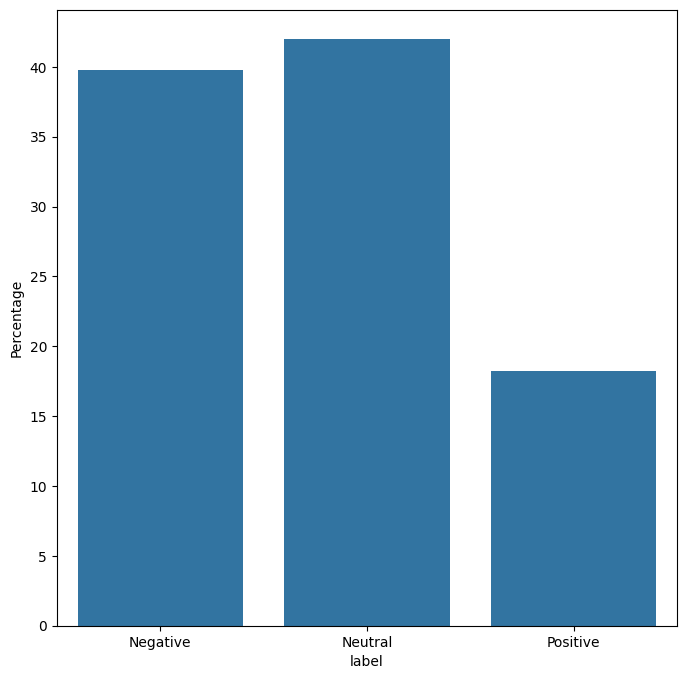

In [53]:
fig, ax = plt.subplots(figsize = (8, 8))
counts = df.label.value_counts(normalize = True)*100

sns.barplot(x=counts.index, y=counts, ax=ax)
ax.set_xticklabels(["Negative", "Neutral", "Positive"])
ax.set_ylabel("Percentage")
plt.show()

In [54]:
#compound score is the overall sentiment of the headline, 
#which can range from -1 to +1 with -1 being negative sentiment and +1 being positive
#final input into the ML models will be the compound score
compound = df[['compound', 'headline']]
compound.head()


,compound,headline
0,0.3818,Ex-Chief of Staff Mark Meadows granted immunit...
1,0.0000,Iran-Linked 'MuddyWater' Spies on Mideast Gov'...
2,0.0000,UN chief ‘shocked’ by ‘misrepresentation’ of c...
3,-0.2263,Hamas terror chief openly supports civilian de...
4,-0.5106,"Spanish clergy sexually abused over 200,000 ch..."


In [55]:
#average of all compound scores 
#normalized to [0,1] and expressed in percentage
mean = df["compound"].mean()
mean = ((mean+1)/2)*100
print(mean)
df['mean'] = mean

43.469958697764824


In [56]:
#making a CSV file with today's date and mean value of sentiments as the columns
from datetime import datetime
df['date']= datetime.today().strftime('%Y-%m-%d')
valuesdf = df[['date', 'mean']].head(1)
valuesdf.to_csv('./CSV-files/news-value.csv', encoding = 'utf-8', index = False)